## Random Forest

In [3]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris=datasets.load_iris()

In [4]:
#Print the label species(setosa, versicolor, virginica)
print(iris.target_names)

#print the name of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
#print the iris data(top 5 records)
print(iris.data[0:5])

#print the iris labels(0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
#creating a Dataframe of given iris dataset
import pandas as pd
data=pd.DataFrame({
     'sepal length':iris.data[:,0],
     'sepal width':iris.data[:,1],
     'petal length':iris.data[:,2],
     'petal width':iris.data[:,3],
     'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
#Import train_test_split function
from sklearn.model_selection import train_test_split

x=data[['sepal length','sepal width','petal length','petal width']]   #Features
y=data['species']  #labels

#split dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [8]:
#import Random forest model
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian classifier
clf=RandomForestClassifier(n_estimators=100)

#train the model using the training set y_pred=clf.predict(x_test)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2,
       0])

In [10]:
#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#model accuracy, how often is the classifier correct?
print("Accuracy:"),metrics.accuracy_score(y_test,y_pred)

Accuracy:


(None, 0.9333333333333333)

In [11]:
clf.predict([[3,5,4,2]])

array([1])

## Feature selection

In [12]:
import pandas as pd
feature_imp=pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.498237
petal width (cm)     0.393110
sepal length (cm)    0.084900
sepal width (cm)     0.023754
dtype: float64

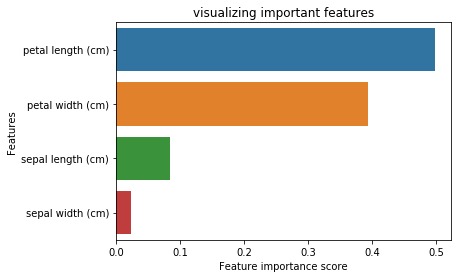

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
#creating a bar plot
sb.barplot(x=feature_imp,y=feature_imp.index)
#Add labels to your graph
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title("visualizing important features")
plt.show()